Part I
---


| Var | Range | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (-2;9) | 110 | 1.25 | 4 | Скотта | t-распределение k = 7 |


In [184]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

import math

n = 110
a = -2
sigma = 9


Task 1


In [185]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[  3.75054884  10.32878698  -7.55244952   3.02087261 -12.11937123
 -14.97629827  -1.62023938   6.9167817    2.41390528  -4.16012193
  12.56155865   7.20940359  -7.85863962 -12.0694472   -6.01319362
   1.69586393  -5.36539231  -2.79113307   8.91919576   8.20209489
   0.94983304 -18.16613762 -10.9412933    6.32151104  -6.6296473
   5.92883294 -18.3353724    5.25521045  -9.69818865  17.00603277
 -11.52388344  22.85075131 -15.85602335  -5.90131119 -18.28615814
   0.9310235  -13.03354943 -19.58813266  26.59695173   4.24330788
  -4.72002143   0.61115406  -2.48092244  -6.24695701   5.00756773
  -3.58078872 -29.40433123  -7.6854077    0.55537349   1.2586522
 -11.72153117   3.27042884  -5.46892931  -3.66297383  14.40230281
  15.52152605   6.86154057   0.58567548  -9.34488032  -6.46745191
 -11.16953643  -3.57729808   8.10679412  -4.20419432 -13.3446956
 -19.93286963  -2.38411293  -2.17229881   7.15655875  -9.01312036
  12.94454439  12.13702631 -10.22702223   6.29563628   1.42054951
   2.59359781

In [186]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


8 -30 27 7.125


In [187]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -30.0 - -22.875
2 interval: -22.875 - -15.75
3 interval: -15.75 - -8.625
4 interval: -8.625 - -1.5
5 interval: -1.5 - 5.625
6 interval: 5.625 - 12.75
7 interval: 12.75 - 19.875
8 interval: 19.875 - 27.0


In [188]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')
# frequency = frequency/n
# print(frequency)
frequency = frequency/n



1 interval: 3
2 interval: 8
3 interval: 16
4 interval: 33
5 interval: 27
6 interval: 14
7 interval: 7
8 interval: 2

Сумма относительных частот - 0.9999999999999999


In [189]:
tmp = frequency/h
for i in range(0, len(tmp)):
    print(f'{i+1} interval: {tmp[i]}')
print(f'Сумма абсолютных частот {tmp.sum()}')


1 interval: 0.0038277511961722485
2 interval: 0.010207336523125997
3 interval: 0.020414673046251993
4 interval: 0.042105263157894736
5 interval: 0.03444976076555024
6 interval: 0.017862838915470493
7 interval: 0.008931419457735247
8 interval: 0.002551834130781499
Сумма абсолютных частот 0.14035087719298245


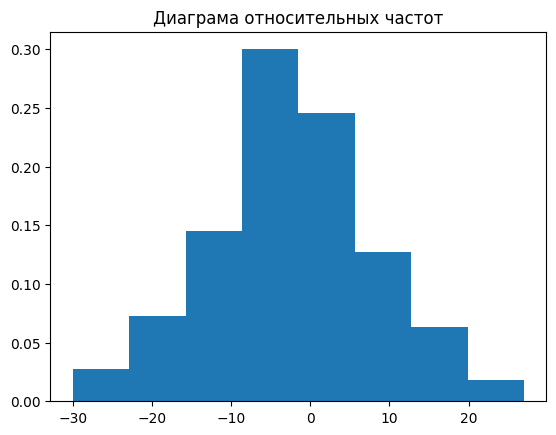

In [190]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)



Task 2

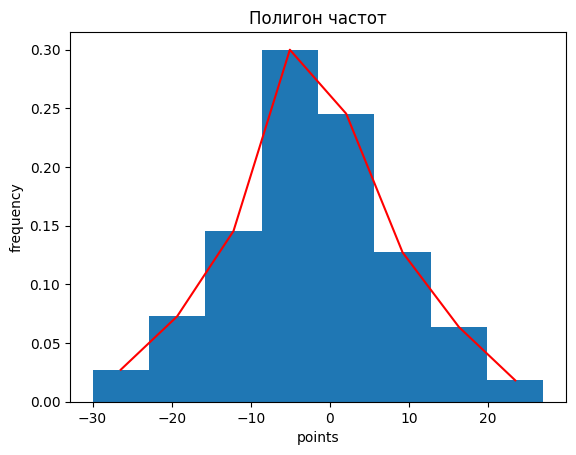

In [195]:
lineY = []
for i in frequency:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)

plt.stairs(frequency, intervals, fill=True)
plt.plot(lineX, lineY, color="red")
plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

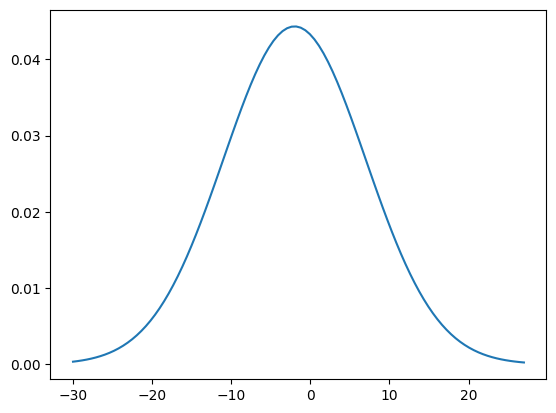

In [192]:
import scipy.stats as stats
x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, stats.norm.pdf(x, a, sigma))
plt.show()

Part II
---
